# Introduction

This project was developed as the Capstone Project to the UC Berkeley Professional Certificate in Machine Learning and Artificial Intelligence Program. The program provides practical insights into the business applications of ML and AI technologies(UC Berkeley Executive Education., n.d.)

## **Background**


Research shows that stress is a major issue for<img src="https://drive.google.com/uc?export=view&id=1lhWuOVyyRi0MuDxuDNNO4S6o6ny7XZ8s" width="200" align="right"> young adults. A 2022 survey found that young adults aged 18–24 reported 5.8 out of 10 stress-related symptoms, compared to a 3.8 score of those aged 65 and older. Stress is also linked to many health issues, including heart disease, cancer, lung ailments, accidents, cirrhosis of the liver, and suicide (Statista, 2023).

Some indications of the ill effects of stress can be visually identified without special equipment, but sustained long term stress may cause internal issues
that are not easily detected. The common method <img src="https://drive.google.com/uc?export=view&id=1j8YOQrziHwoCIfbzYkQ2XteYd3isumgK" width="80" align="right">of measuring underlying stress conditions requires a trip to a medical facility where expensive medical equipment is used by trained clinicians.

If there was a way that a person could accurately and inexpensively measure their stress levels without going to a clinic, they could use that information as feedback so that they could learn to monitor and control their stress levels on their own.
## **Capstone Research Question**


***Can commonly available wearable devices be used to accurately self-monitor stress levels?***



# **2. Understanding the Data**
## **Data Sources**
Developing an accurate machine learning model requires training data of heart rate signals during various target conditions, such as subjects that were relaxed or under stressful circumstances.

An ideal data source was identified:


**WESAD**

WESAD (Wearable Stress and Affect Detection) contains data of 15 subjects during a stress-affect lab study, while wearing physiological and motion sensors. WESAD is a publicly available dataset for wearable stress and affect detection. This multimodal dataset features physiological and motion data, recorded from both a wrist- and a chest-worn device, of 15 subjects during a lab study. The following sensor modalities are included: blood volume pulse, electrocardiogram, electrodermal activity, electromyogram, respiration, body temperature, and three-axis acceleration. Moreover, the dataset bridges the gap between previous lab studies on stress and emotions, by containing three different affective states (neutral, stress, amusement). In addition, self-reports of the subjects, which were obtained using several established questionnaires, are contained in the dataset.(Schmidt, et.al., 2018)

 The original paper and links to download the dataset can be found via this link: https://archive.ics.uci.edu/dataset/465/wesad+wearable+stress+and+affect+detection


## **Data Content**


 The WESAD dataset include Electrocardiogram (ECG) measures of various subjects during hours of stressing, amusing, relaxing, and neutral situations. Below is a table listing the ECG data field acronyms with their definitions, although a smaller subset will used:

| Acronym | Definition |
|---------|------------|
| MEAN_RR | Mean of RR intervals |
| MEDIAN_RR | Median of RR intervals |
| SDRR | Standard deviation of RR intervals |
| RMSSD | Root mean square of successive RR interval differences |
| SDSD | Standard deviation of successive RR interval differences |
| SDRR_RMSSD | Ratio of SDRR to RMSSD |
| HR | Heart rate |
| pNN25 | Percentage of successive RR intervals that differ by more than 25 ms |
| pNN50 | Percentage of successive RR intervals that differ by more than 50 ms |
| SD1 | Poincaré plot standard deviation perpendicular to the line of identity |
| SD2 | Poincaré plot standard deviation along the line of identity |
| KURT | Kurtosis of RR intervals |
| SKEW | Skewness of RR intervals |
| MEAN_REL_RR | Mean of relative RR intervals |
| MEDIAN_REL_RR | Median of relative RR intervals |
| SDRR_REL_RR | Standard deviation of relative RR intervals |
| RMSSD_REL_RR | Root mean square of successive differences of relative RR intervals |
| SDSD_REL_RR | Standard deviation of successive differences of relative RR intervals |
| SDRR_RMSSD_REL_RR | Ratio of SDRR to RMSSD for relative RR intervals |
| KURT_REL_RR | Kurtosis of relative RR intervals |
| SKEW_REL_RR | Skewness of relative RR intervals |
| VLF | Very low frequency power |
| VLF_PCT | Very low frequency power as a percentage of total power |
| LF | Low frequency power |
| LF_PCT | Low frequency power as a percentage of total power |
| LF_NU | Low frequency power in normalized units |
| HF | High frequency power |
| HF_PCT | High frequency power as a percentage of total power |
| HF_NU | High frequency power in normalized units |
| TP | Total power |
| LF_HF | Ratio of low frequency to high frequency power |
| HF_LF | Ratio of high frequency to low frequency power |








---



### Import Libraries

In [ ]:
!pip install neurokit2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
import  pickle
import seaborn as sns
import sklearn as sklearn
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import neurokit2 as nk
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import time
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load WESAD Data  (Subject 2)

In [ ]:
s2_path = r"/content/drive/MyDrive/Capstone/WESAD/S2/S2.pkl"
with open(s2_path, 'rb') as file:
    s2_data = pickle.load(file, encoding='latin1')

### Create different data segments with different features

In [ ]:
c_ax=s2_data['signal']['chest']['ACC'][0:,0]#[baseline_to_plot]
c_ay=s2_data['signal']['chest']['ACC'][0:,1]#[baseline_to_plot]#[0:100] # hundred values
c_az=s2_data['signal']['chest']['ACC'][0:,2]#[baseline_to_plot]
c_ecg=s2_data['signal']['chest']['ECG'][:,0]#[baseline_to_plot]
c_emg=s2_data['signal']['chest']['EMG'][:,0]#[baseline_to_plot]
c_eda=s2_data['signal']['chest']['EDA'][:,0]#[baseline_to_plot]
c_temp=s2_data['signal']['chest']['Temp'][:,0]#[baseline_to_plot]
c_resp=s2_data['signal']['chest']['Resp'][:,0]#[baseline_to_plot]
w_ax=s2_data['signal']['wrist']['ACC'][0:,0]#[stress_to_plot]
w_ay=s2_data['signal']['wrist']['ACC'][0:,1]#[stress_to_plot]
w_az=s2_data['signal']['wrist']['ACC'][0:,2]#[stress_to_plot]
w_bvp=s2_data['signal']['wrist']['BVP'][:,0]#[stress_to_plot]
w_eda=s2_data['signal']['wrist']['EDA'][:,0]#[stress_to_plot]
w_temp=s2_data['signal']['wrist']['TEMP'][:,0]#[stress_to_plot]
w_label=s2_data['label']

print("Done")

Done


In [ ]:
numpy_data1=np.array([c_ax, c_ay, c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label])
numpy_data1=numpy_data1.T

#df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_ax","w_ay","w_az","w_bvp","w_eda","w_temp"],orient='index')
df = pd.DataFrame(data=numpy_data1, columns=["c_ax", "c_ay", "c_az","c_ecg","c_emg","c_eda","c_temp","c_resp","w_label"])

print("data frame combined")

data frame combined


### Display shapes to verify symmetry

In [ ]:
df.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0


In [ ]:
display(df.shape)
display(df.info)
display(df.describe)

(4255300, 9)

<bound method DataFrame.info of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0.0  
1       -1.124573      0.0  
2       -1.152039      0.0  
3       -1.158142      0.0  
4       -1.161194      0.0  
...           ...      ...  
4255295 -1.063538      0.0  
4255296 -1.106262      0.0  
4255297 -1.103210      0.0  
4255298 -1.086426      0.0  
4255299 -1.097107      0.0  

[4255300 rows x 9 columns]>

<bound method NDFrame.describe of            c_ax    c_ay    c_az     c_ecg     c_emg     c_eda     c_temp  \
0        0.9554 -0.2220 -0.5580  0.021423 -0.004440  5.250549  30.120758   
1        0.9258 -0.2216 -0.5538  0.020325  0.004349  5.267334  30.129517   
2        0.9082 -0.2196 -0.5392  0.016525  0.005173  5.243301  30.138214   
3        0.8974 -0.2102 -0.5122  0.016708  0.007187  5.249405  30.129517   
4        0.8882 -0.2036 -0.4824  0.011673 -0.015152  5.286407  30.130951   
...         ...     ...     ...       ...       ...       ...        ...   
4255295  0.8750 -0.1234 -0.2974 -0.013138  0.020370  0.400162  31.457733   
4255296  0.8750 -0.1262 -0.2988 -0.010345  0.019592  0.355911  31.476898   
4255297  0.8718 -0.1238 -0.3042 -0.005447 -0.017166  0.360489  31.459229   
4255298  0.8730 -0.1234 -0.3026  0.000137 -0.028976  0.365829  31.484283   
4255299  0.8702 -0.1220 -0.3022  0.004074 -0.023575  0.365448  31.456268   

           c_resp  w_label  
0       -1.148987      0.0  
1       -1.124573      0.0  
2       -1.152039      0.0  
3       -1.158142      0.0  
4       -1.161194      0.0  
...           ...      ...  
4255295 -1.063538      0.0  
4255296 -1.106262      0.0  
4255297 -1.103210      0.0  
4255298 -1.086426      0.0  
4255299 -1.097107      0.0  

[4255300 rows x 9 columns]>

In [ ]:
df_sample = df.tail(50000)
# Find peaks -  Data was collected at 700hz
peaks, info = nk.ecg_peaks(df_sample["c_ecg"], sampling_rate=700)

,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,889.963834,357.828351,NaN,NaN,NaN,NaN,NaN,NaN,420.558455,422.924977,...,284.285714,0.850841,681.142857,1037.714286,53.164557,81.012658,315.714286,2948.571429,26.333333,367.1875


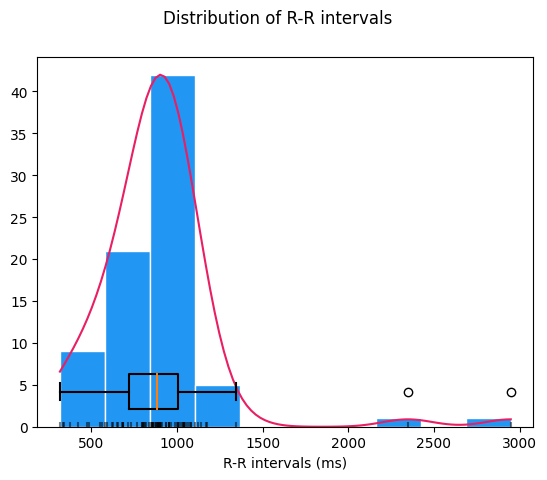

In [ ]:
hrv_time = nk.hrv_time(peaks, sampling_rate=700, show=True)
hrv_time

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_TP,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.079618,0.054675,0.004121,0.138414,1.45621,0.575218,0.39501,-2.906348


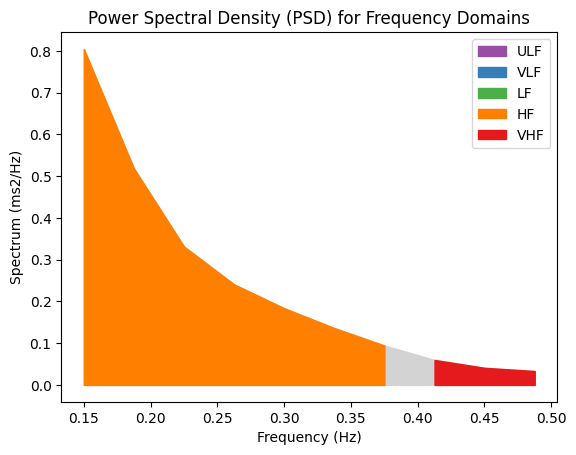

In [ ]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=700, show=True, normalize=True)
hrv_freq

In [ ]:
# Automatically process the (raw) ECG signal
signals, info = nk.ecg_process(df_sample['c_ecg'], sampling_rate=700)

In [ ]:
# Extract clean ECG and R-peaks location
rpeaks = info["ECG_R_Peaks"]
cleaned_ecg = signals["ECG_Clean"]

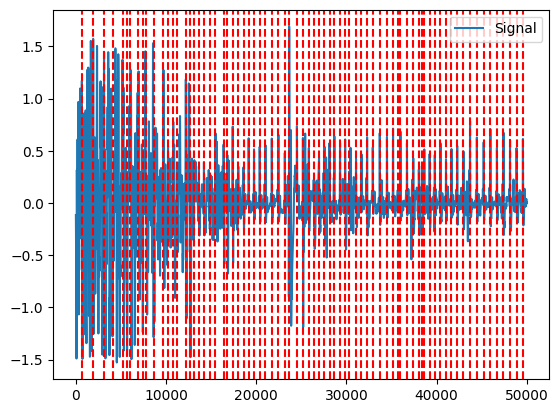

In [ ]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks, cleaned_ecg)

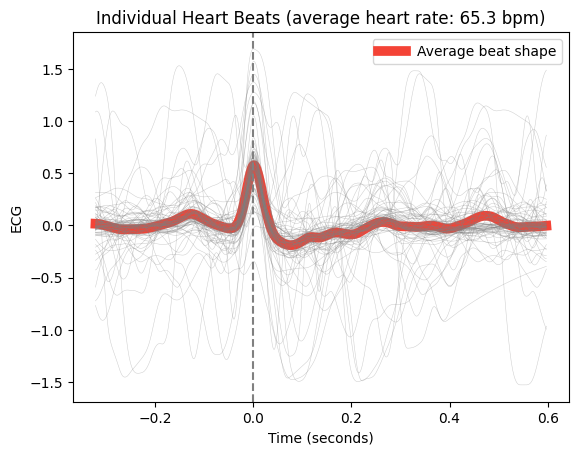

In [ ]:
# Plotting all the heart beats
epochs = nk.ecg_segment(cleaned_ecg, rpeaks=None, sampling_rate=700, show=True)

# Calculating the interquartile range

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)) )

IQR is
 c_ax       0.271200
c_ay       0.054000
c_az       0.507400
c_ecg      0.112335
c_emg      0.012314
c_eda      0.746918
c_temp     1.240173
c_resp     3.100586
w_label    2.000000
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(2100456, 9)


In [ ]:
#mean normalization
norm_df_out=(df_out-df_out.mean())/df_out.std()
#min-max normalization:
#norm_df_out=(df_out-df_out.min())/(df_out.max()-df_out.min())

norm_y = df_out.w_label #keep original labels Dont normalize labels
norm_x = norm_df_out.drop('w_label',axis=1)


norm_x_train,norm_x_test,norm_y_train,norm_y_test=train_test_split(norm_x,norm_y,test_size=0.2)

In [ ]:
norm_df_out.head()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
393691,-1.678430,2.251221,-1.593856,-0.326259,-0.675595,3.563482,-4.750996,-0.416753,-0.108962
394476,-1.697992,2.116280,-1.564093,-1.913346,-1.408406,3.553901,-4.753546,0.864869,-0.108962
395154,-1.710440,2.244120,-1.574550,0.843406,1.302484,3.587000,-4.748553,-0.731728,-0.108962
396635,-1.746005,1.952928,-1.606727,-1.452419,0.221203,3.586129,-4.753546,1.121464,-0.108962
402178,-1.712218,2.158892,-1.596269,0.766310,-0.537232,3.553901,-4.571494,0.949722,-0.108962


In [ ]:
norm_df_out.describe()

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp,w_label
count,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06,2.100456e+06
mean,1.682200e-16,6.227062e-17,-1.660144e-16,6.819729e-18,-1.407246e-17,-3.169550e-16,-2.865856e-15,-1.104147e-17,4.483701e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.534372e+00,-3.814046e+00,-2.495604e+00,-2.629794e+00,-2.776663e+00,-1.856971e+00,-4.756042e+00,-2.715254e+00,-7.712019e-01
25%,-1.750292e-02,-6.535731e-01,-4.483708e-01,-5.757211e-01,-6.448473e-01,-7.211407e-01,-6.176719e-01,-7.154357e-01,-7.712019e-01
50%,4.164009e-01,-8.539912e-02,1.235676e-01,2.470093e-01,6.234153e-02,-1.995722e-02,-1.520821e-01,-1.092451e-01,-7.712019e-01
75%,6.226834e-01,5.537980e-01,5.812790e-01,6.049576e-01,6.619147e-01,3.711377e-01,7.266278e-01,7.331766e-01,5.532788e-01
max,4.150819e+00,3.856315e+00,3.420860e+00,2.775776e+00,2.732236e+00,3.596582e+00,3.874975e+00,2.802235e+00,1.877759e+00


In [ ]:
norm_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2100456 entries, 393691 to 4255299
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   c_ax     float64
 1   c_ay     float64
 2   c_az     float64
 3   c_ecg    float64
 4   c_emg    float64
 5   c_eda    float64
 6   c_temp   float64
 7   c_resp   float64
 8   w_label  float64
dtypes: float64(9)
memory usage: 160.3 MB


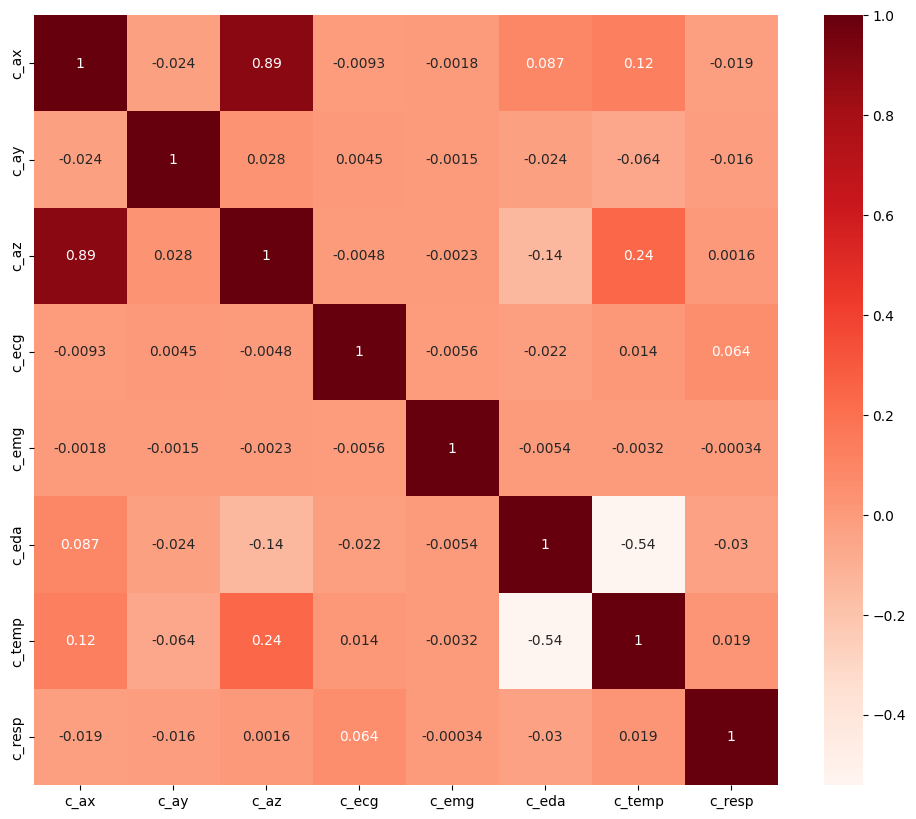

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = norm_x.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
X_1 = sm.add_constant(norm_x)
#Fitting sm.OLS model
model = sm.OLS(norm_y,X_1).fit()
model.pvalues

const     0.000000e+00
c_ax      0.000000e+00
c_ay      0.000000e+00
c_az      0.000000e+00
c_ecg     7.725890e-02
c_emg     3.944850e-33
c_eda     0.000000e+00
c_temp    0.000000e+00
c_resp    0.000000e+00
dtype: float64

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(QuadraticDiscriminantAnalysis(),
           k_features=7,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(norm_x, norm_y)
sfs.k_feature_names_     # to get the final set of features

('c_ay', 'c_az', 'c_ecg', 'c_emg', 'c_eda', 'c_temp', 'c_resp')

In [ ]:

norm_x_train


,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3827326,0.732937,-0.099604,0.806515,1.442557,-1.398157,-0.969386,0.987224,-1.360319
1404107,0.169218,-1.562654,0.330302,0.353843,0.964264,0.051468,-1.392133,-1.289043
4243307,1.278874,2.229915,0.299734,-1.805962,-0.583353,-1.564303,-0.494995,-0.203602
3054558,-2.357739,-0.305567,-1.850464,1.374271,0.000847,-0.698494,-0.167430,0.480654
1126248,0.025176,-0.696187,-0.412976,0.178173,0.810527,0.358943,-0.070085,-0.253835
...,...,...,...,...,...,...,...,...
3309033,0.754277,-1.079705,0.631957,-1.604960,1.666328,-0.821310,-0.152082,1.124180
2806326,0.501759,-1.342485,0.235381,-1.975024,-1.557018,-0.490316,0.920044,0.209803
1159262,0.085638,-0.241648,-0.461241,-1.955199,1.374228,0.165573,0.690568,-0.318323
1226694,-0.028172,0.788171,-0.537661,0.351090,-1.095808,0.079341,0.510323,-0.834909


In [ ]:
norm_y_train

3827326    0.0
1404107    0.0
4243307    0.0
3054558    4.0
1126248    0.0
          ... 
3309033    0.0
2806326    0.0
1159262    0.0
1226694    0.0
3591482    0.0
Name: w_label, Length: 1680364, dtype: float64

In [ ]:
norm_x_test

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
1254895,-0.252238,0.440163,-0.712218,0.709038,0.216078,0.013142,-0.954424,-0.817259
2868926,-1.913165,0.880500,-1.678319,0.889664,0.431310,-0.370984,0.083766,-0.009458
3270665,0.574669,0.916010,2.034855,-0.056421,-0.122143,-0.747272,0.029916,-1.330451
4169912,0.665362,1.008337,1.841796,0.168811,-1.362285,-1.434519,1.232685,1.064443
1116988,-0.159767,-1.988786,-0.565815,-1.885812,0.287822,0.409463,-0.740137,0.729104
...,...,...,...,...,...,...,...,...
2880019,-1.930949,0.596412,-1.726584,0.789439,-1.121431,-0.381437,-0.090584,-0.405892
2322771,-0.759052,-0.170625,-1.070987,0.163855,-1.843994,0.474791,0.515474,1.944200
3256461,0.507094,1.171689,2.082315,0.032791,0.062342,-0.737690,-0.231424,0.982984
3552440,0.626240,-0.866640,0.563582,0.014068,0.103338,-1.072168,2.086063,-0.690319


In [ ]:
norm_y_test

1254895    0.0
2868926    4.0
3270665    0.0
4169912    0.0
1116988    0.0
          ... 
2880019    4.0
2322771    0.0
3256461    0.0
3552440    3.0
1866954    2.0
Name: w_label, Length: 420092, dtype: float64

In [ ]:
y=df_out.w_label
x=df_out.drop('w_label',axis=1)
#print(x)
#print("\n-----\n")
#print(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y

393691     1.0
394476     1.0
395154     1.0
396635     1.0
402178     1.0
          ... 
4255293    0.0
4255295    0.0
4255296    0.0
4255297    0.0
4255299    0.0
Name: w_label, Length: 2100456, dtype: float64

In [ ]:
(x_train)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3428347,0.9118,-0.1462,-0.0552,0.043533,-0.007141,0.817108,31.970703,1.373291
3826211,0.9078,-0.1142,-0.0754,-0.036163,0.011307,0.661850,31.995941,3.489685
3577560,0.8996,-0.1566,-0.1758,0.024033,-0.006500,0.575256,32.781342,-1.519775
1502798,0.8904,-0.1170,-0.2312,-0.171799,-0.006546,1.112366,30.636261,-0.382996
1458592,0.8878,-0.1094,-0.2670,0.009659,-0.006042,1.122284,30.636261,-2.828979
...,...,...,...,...,...,...,...,...
3627005,0.8962,-0.1198,-0.2238,-0.003571,-0.004440,0.635910,32.427155,4.100037
1924616,0.8666,-0.1430,-0.2826,0.021286,0.004898,2.328110,31.254608,0.297546
4181452,0.9048,-0.1270,-0.1574,-0.048889,-0.023117,0.460815,32.180023,6.224060
1403410,0.8746,-0.1494,-0.2582,0.060242,-0.004166,1.128769,30.684479,-1.222229


In [ ]:
(y_train)

3428347    3.0
3826211    0.0
3577560    3.0
1502798    0.0
1458592    0.0
          ... 
3627005    0.0
1924616    2.0
4181452    0.0
1403410    0.0
3488727    3.0
Name: w_label, Length: 1680364, dtype: float64

In [ ]:
(x_test)

,c_ax,c_ay,c_az,c_ecg,c_emg,c_eda,c_temp,c_resp
3353633,0.9102,-0.1506,-0.0884,0.020096,0.006729,0.745773,31.757477,-2.384949
1098859,0.8398,-0.1202,-0.4160,-0.175415,-0.013229,1.291656,31.142914,4.202271
3012659,0.5810,-0.1262,-0.7512,0.007324,0.002060,0.862122,31.338440,-0.486755
1251309,0.7990,-0.1160,-0.4718,-0.193909,-0.010849,1.130295,30.977142,-0.128174
1684403,0.8858,-0.1398,-0.2534,-0.002243,-0.002060,1.269531,31.298737,-4.490662
...,...,...,...,...,...,...,...,...
1687233,0.8754,-0.1494,-0.2546,0.063995,-0.026047,1.264954,31.294312,4.351807
3631088,0.8890,-0.1166,-0.2522,-0.051315,0.001785,0.625992,32.433167,-1.719666
1137923,0.8320,-0.1352,-0.4094,-0.029434,0.006180,1.222229,31.584625,-1.802063
4158585,0.9058,-0.1094,0.1610,-0.030624,0.009476,0.502396,32.099823,-2.410889


In [ ]:
(y_test)

3353633    3.0
1098859    0.0
3012659    4.0
1251309    0.0
1684403    2.0
          ... 
1687233    2.0
3631088    0.0
1137923    0.0
4158585    0.0
1560405    0.0
Name: w_label, Length: 420092, dtype: float64

## Modeling

In [ ]:
X_train = x_train.tail(10000)
y_train = y_train.tail(10000)
X_test = x_test.tail(10000)
y_test = y_test.tail(10000)


### A Simple Baseline Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
# Create a baseline model using the LogisticRegression classifier
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

LogisticRegression()

### Score the Model

What is the accuracy of your model?

In [ ]:
baseline_score = accuracy_score(y_test, baseline_model.predict(X_test))

print(f"Baseline Accuracy: {baseline_score:.2f}")


Baseline Accuracy: 0.66


### Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, we will fit and score each.  We will compare the fit time of each of the models.  

In [ ]:
# We now aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:
# | Model | Train Time | Train Accuracy | Test Accuracy |

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

model_results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    y_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)

    model_results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

results_df = pd.DataFrame(model_results)



In [ ]:
# Create a styled DataFrame
styled_df = results_df.style.set_caption('Model Performance Comparison').set_table_styles([
    {'selector': 'caption', 'props': [('text-align', 'center')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame
styled_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.340793,0.652400,0.659000
1,KNN,0.023268,0.950000,0.922200
2,Decision Tree,0.083756,1.000000,0.971400
3,SVM,3.545562,0.584400,0.586200


### Improving the Model

Now that we have some basic models on the board, we want to try to improve these.
Below, we create models with various hyperperameters. We will select the best combination of hyperparameters for each classification model.

In [ ]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [1],
        'solver': ['saga']
    },
    'Decision Tree': {
        'max_depth': [10],
        'min_samples_split': [10],
        'min_samples_leaf': [4]
    },
    'KNN': {
        'n_neighbors': [9],
        'weights': ['uniform'],
        'metric': [ 'manhattan']
    },
    'SVM': {
        'C': [10],
        'kernel': ['linear'],
        'gamma': ['scale']
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [ ]:
# Perform grid search for each model
model_results = []

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], scoring='accuracy', cv=5)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    y_pred = grid_search.predict(X_test)
    test_time = time.time() - end_time
    test_accuracy = accuracy_score(y_test, y_pred)

    model_results.append({
        'Model': name,
        'Best Parameters': grid_search.best_params_,
        'Train Time': train_time,
        'Test Time': test_time,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame with results
results_df = pd.DataFrame(model_results)

# Display results
print("Model Comparison")
print(results_df.to_string())

Model Comparison
                 Model                                                    Best Parameters  Train Time  Test Time  Test Accuracy
0  Logistic Regression                                         {'C': 1, 'solver': 'saga'}   30.788350   0.002930         0.7444
1        Decision Tree  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}    0.399076   0.002623         0.9701
2                  KNN    {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}    0.753999   0.678823         0.9349
3                  SVM                    {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}   33.357945   1.326680         0.8110


In [ ]:
# Create a styled DataFrame
styled_df = results_df.style.set_caption('Model Performance Comparison').set_table_styles([
    {'selector': 'caption', 'props': [('text-align', 'center')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame
styled_df

,Model,Best Parameters,Train Time,Test Time,Test Accuracy
0,Logistic Regression,"{'C': 1, 'solver': 'saga'}",30.788350,0.002930,0.744400
1,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}",0.399076,0.002623,0.970100
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}",0.753999,0.678823,0.934900
3,SVM,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",33.357945,1.326680,0.811000


# Precision, Recall, and F1 Scores
Now run the models with the best hyperparameters and calculate the Precision, Recal and F1 Scores

In [ ]:
# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [1],
        'solver': ['saga']
    },
    'Decision Tree': {
        'max_depth': [10],
        'min_samples_split': [10],
        'min_samples_leaf': [4]
    },
    'KNN': {
        'n_neighbors': [9],
        'weights': ['uniform'],
        'metric': [ 'manhattan']
    },
    'SVM': {
        'C': [10],
        'kernel': ['linear'],
        'gamma': ['scale']
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}

In [ ]:
# Initialize lists to store metrics
precision_scores = []
recall_scores = []
f1_scores = []

# Iterate through each model
for name, model in models.items():
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Use 'macro' averaging for multiclass classification
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

In [ ]:
# Print the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM'],
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

print(results_df.to_string())

                 Model  Precision    Recall  F1 Score
0  Logistic Regression   0.782271  0.564773  0.606356
1        Decision Tree   0.972543  0.962694  0.967496
2                  KNN   0.904197  0.910063  0.904485
3                  SVM   0.117240  0.200000  0.147825


In [ ]:
# Create a styled DataFrame
styled_df = results_df.style.set_caption('Model Performance Comparison').set_table_styles([
    {'selector': 'caption', 'props': [('text-align', 'center')]},
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
])

# Display the styled DataFrame
styled_df

,Model,Precision,Recall,F1 Score
0,Logistic Regression,0.782271,0.564773,0.606356
1,Decision Tree,0.972543,0.962694,0.967496
2,KNN,0.904197,0.910063,0.904485
3,SVM,0.117240,0.200000,0.147825


#### END OF THE NOTEBOOK